##### Fashion MNIST 분류 실습 (Dense 모델)
- 목표: 흑백 옷 이미지(28x28)를 10종류로 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

In [2]:
# 1) 데이터 불러오기
#   - X: 픽셀값(0~255)인 28x28 흑백 이미지
#   - y: 정수 레이블(0~9, 10클래스)
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# 2) 정규화 (0~255 → 0~1)
#   - 신경망 학습 안정화 및 수렴 속도 향상
X_train_full = X_train_full.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [4]:
# 3) 훈련/검증 분할
#   - 원본 훈련 전체(X_train_full)에서 10%를 검증으로 분리
#   - 이미지 분류는 시계열(순서가 중요)이 아니므로 무작위 분할 사용해도 무방
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42
)

# 분할된 데이터의 크기 출력
print(f"학습 데이터: {X_train.shape}, 검증 데이터: {X_val.shape}, 테스트 데이터: {X_test.shape}")

학습 데이터: (54000, 28, 28), 검증 데이터: (6000, 28, 28), 테스트 데이터: (10000, 28, 28)


In [5]:
# 5) 모델 정의
#   - CNN 기본 흐름: (Conv → ReLU → Pool) × k → Flatten → Dense → 출력
#   - 아래 구조는 Conv + Pool 두 번이 아니라 Pool을 두 번 연속 적용
#     → 특징 맵 크기가 급격히 작아질 수 있으므로, 실제로는 Conv+Pool을 여러 번 반복하는 것이 더 흔함
# 커널 크기와 스트라이드(얼마나 건너뛰면서 넘어갈거냐)에 따라 입력 크기가 나눠떨어지지 않으면 남는 부분은 잘려 나가고 버려짐
model = Sequential()

# 첫 번째 합성곱 층
#   - 필터 수: 32, 커널 크기: 3x3, 활성함수: ReLU
#   - input_shape: (높이, 너비, 채널) = (32, 32, 1)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# 최대 풀링(MaxPooling)으로 공간 크기 절반 축소
model.add(MaxPooling2D(pool_size=(2, 2)))

# 여기서는 두 번째 Conv 없이 Pool을 또 적용
#   - 학습 목적의 간단 예시로는 가능하지만, 성능 최적화에는 Conv→Pool 쌍을 반복하는 구성이 일반적
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2D 특징 맵 → 1D 벡터로 펼치기
model.add(Flatten())

# 완전연결층(Dense): 128 유닛, ReLU
model.add(Dense(128, activation='relu'))

# 출력층: 10클래스, softmax (확률 분포 출력)
model.add(Dense(10, activation='softmax'))

# 모델 구조 요약 출력
model.summary()

c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,194 (582.79 KB)

 Trainable params: 149,194 (582.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 6) 컴파일
#   - optimizer='adam' : 적응적 학습률로 빠른 수렴
#   - loss='sparse_categorical_crossentropy' : y가 정수 레이블일 때 사용
#   - metrics=['accuracy'] : 정확도 모니터링
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# 7) 학습
#   - validation_data로 검증 성능을 에폭마다 확인
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val)
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8300 - loss: 0.4790 - val_accuracy: 0.8675 - val_loss: 0.3570
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8767 - loss: 0.3406 - val_accuracy: 0.8860 - val_loss: 0.3098
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8909 - loss: 0.3003 - val_accuracy: 0.8825 - val_loss: 0.3170
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9002 - loss: 0.2743 - val_accuracy: 0.8937 - val_loss: 0.2868
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9056 - loss: 0.2550 - val_accuracy: 0.8962 - val_loss: 0.2826
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9125 - loss: 0.2374 - val_accuracy: 0.9023 - val_loss: 0.2597
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9181 - loss: 0.2212 - val_accuracy: 0.9013 - val_loss: 0.2674
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9225 - loss: 0.2076 

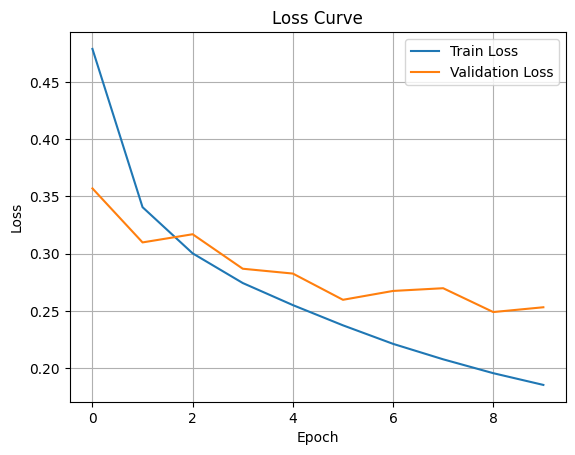

In [8]:
# 8) 손실 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


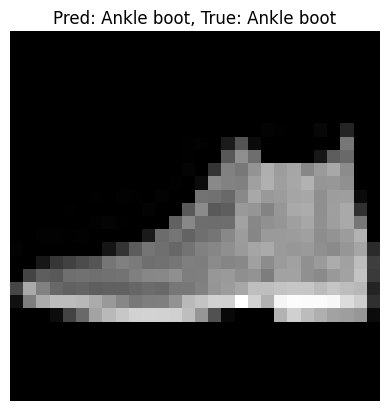

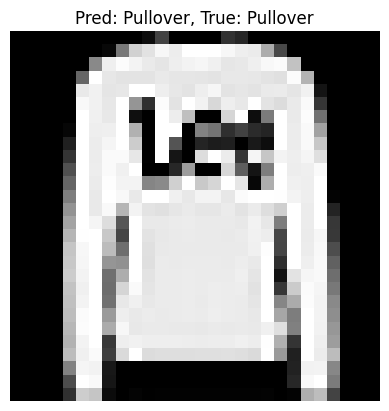

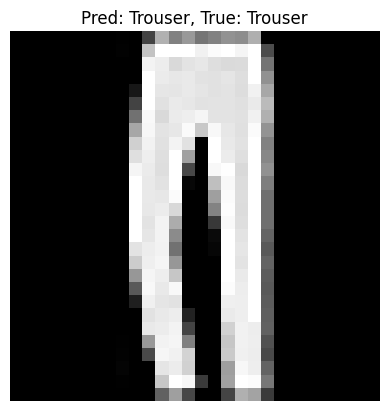

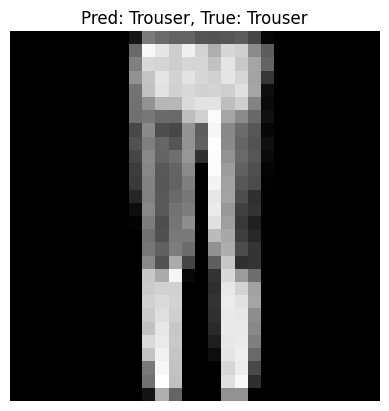

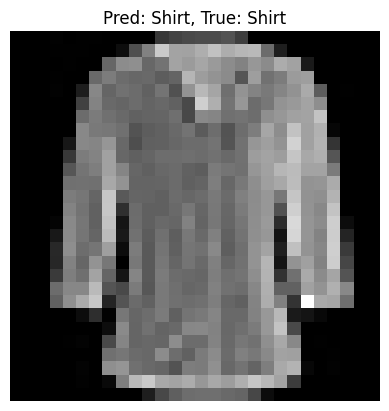

In [9]:
#   - 테스트 앞 5개 샘플에 대해 예측 라벨과 실제 라벨을 비교
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

preds = model.predict(X_test[:5])
# argmax: 어떤 배열(리스트, 벡터 등)에서 최댓값이 있는 위치(인덱스)를 반환하는 함수
pred_labels = np.argmax(preds, axis=1)

for i in range(5):
    # imshow는 2D를 기대하므로 채널 축 제거
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {class_names[pred_labels[i]]}, True: {class_names[y_test[i]]}")
    plt.axis('off')
    plt.show()

##### 시계열 - 주가 예측 (LSTM)
###### - AAPL 주가 예측

##### 시계열 - 주가 예측 (LSTM)
- AAPL 주가 예측

In [10]:
# 참고: yfinance는 사전에 설치 필요
# !pip install yfinance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf  # pip install yfinance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
# 1) 데이터 다운로드
#    - 시계열 예측에서는 '종가(Close)'만 사용 (단변량)
df = yf.download('AAPL', start='2020-01-01', end='2025-07-01')
close = df['Close'].values.reshape(-1, 1)      # shape: (N, 1)
dates_all = df.index      

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_1340\261471398.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2020-01-01', end='2025-07-01')
[*********************100%***********************]  1 of 1 completed


In [12]:
# 2) 시간 순서 기반 분할 (70% / 15% / 15%)
#    - 분할은 원시 시계열에서 먼저 수행
#    - 이후 스케일러는 반드시 'train'에만 fit
# 시계열 데이터는 시간 순서가 중요합니다.
# 랜덤하게 섞어 분할하면 미래 데이터를 학습에 포함시켜버리는 데이터 누설(leakage) 문제가 생깁니다.
# 따라서 과거 데이터로 학습하고, 미래 데이터로 검증/테스트를 보는 게 현실적인 시나리오에 가깝습니다.

N = len(close)
train_end = int(N * 0.70)
val_end   = int(N * 0.85)

close_train = close[:train_end]
close_val   = close[train_end:val_end]
close_test  = close[val_end:]

In [13]:
# 3) 스케일링 (train에만 fit → 전 구간 transform)
#    - 데이터 누설 방지
scaler = MinMaxScaler()
scaler.fit(close_train)                # train에만 적합
close_scaled = scaler.transform(close) # 전 구간 변환

In [14]:
# 4) 시퀀스 생성 함수
#    - [start, end) 구간 내부에서만 window를 구성
#    - X: 연속된 window 길이, y: 다음 시점 하나
#    - y와 1:1로 대응하는 날짜 배열(dates_out)도 함께 반환
'''
LSTM은 순차 데이터(window 길이만큼) 를 입력으로 받고, 그 다음 시점 값을 예측하는 구조
따라서 원래 종가 데이터 [p1, p2, p3, ..., pN] 를 그냥 통째로 쓰지 않고
X: 과거 window 길이 (예: 10일)
y: 그 다음 날 값으로 학습용 데이터셋을 만들어야 함
'''

def create_sequences_by_range(data_scaled, dates, start, end, window=10):
    X, y, dates_out = [], [], []
    # i는 입력 시퀀스의 시작 인덱스
    # y는 i+window 위치의 값이므로 i+window < end 여야 함
    for i in range(start, end - window):
        X.append(data_scaled[i : i + window])
        y.append(data_scaled[i + window])
        dates_out.append(dates[i + window])
    return np.array(X), np.array(y), np.array(dates_out)

X_train, y_train, dates_train = create_sequences_by_range(close_scaled, dates_all, 0, train_end, 10)
X_val,   y_val,   dates_val   = create_sequences_by_range(close_scaled, dates_all, train_end, val_end, 10)
X_test,  y_test,  dates_test  = create_sequences_by_range(close_scaled, dates_all, val_end, N, 10)

print("Train:", X_train.shape, y_train.shape)
print("Val  :", X_val.shape,   y_val.shape)
print("Test :", X_test.shape,  y_test.shape)

Train: (955, 10, 1) (955, 1)
Val  : (198, 10, 1) (198, 1)
Test : (197, 10, 1) (197, 1)


In [15]:
# 5) LSTM 모델 구성
#   - 입력 차원: (window 길이, 1 특성)
#   - return_sequences=False: 마지막 타임스텝 출력만 Dense로 전달
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mae', metrics=['mse','mae'])
model.summary()

c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 6) 학습
#   - epochs/batch_size는 데이터 규모와 수렴 정도에 따라 조정
history = model.fit(
    X_train, y_train,
    epochs=30, batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1173 - mae: 0.1173 - mse: 0.0312 - val_loss: 0.0301 - val_mae: 0.0301 - val_mse: 0.0015
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0298 - mae: 0.0298 - mse: 0.0014 - val_loss: 0.0279 - val_mae: 0.0279 - val_mse: 0.0013
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0245 - mae: 0.0245 - mse: 9.9186e-04 - val_loss: 0.0296 - val_mae: 0.0296 - val_mse: 0.0014
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - mae: 0.0245 - mse: 9.8822e-04 - val_loss: 0.0293 - val_mae: 0.0293 - val_mse: 0.0013
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0242 - mae: 0.0242 - mse: 9.8194e-04 - val_loss: 0.0288 - val_mae: 0.0288 - val_mse: 0.0013
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - mae: 0.0237 - mse: 9.3378e-04 - val_loss: 0.0271 - val_mae: 0.0271 - val_mse: 0.0013
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0232 - mae: 0.0232 - mse: 8.8875e-04 - val_los

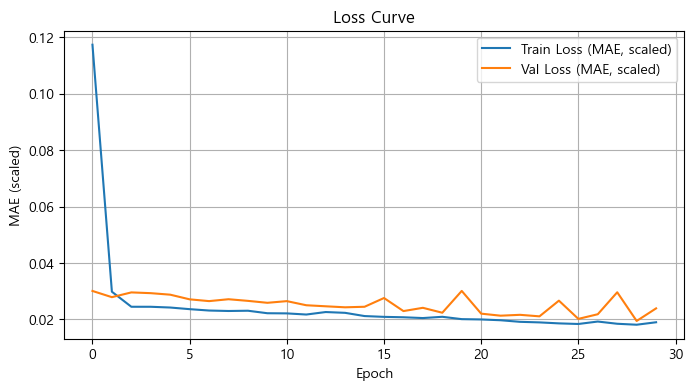

In [17]:
# 7) 손실 시각화
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정(환경에 폰트가 있어야 함)
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss (MAE, scaled)')
plt.plot(history.history['val_loss'], label='Val Loss (MAE, scaled)')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MAE (scaled)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# 8) 테스트 데이터 예측 & 시각화
#   - inverse_transform으로 스케일 원래대로 되돌리기
y_pred = model.predict(X_test)

# 역스케일 (달러 단위)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


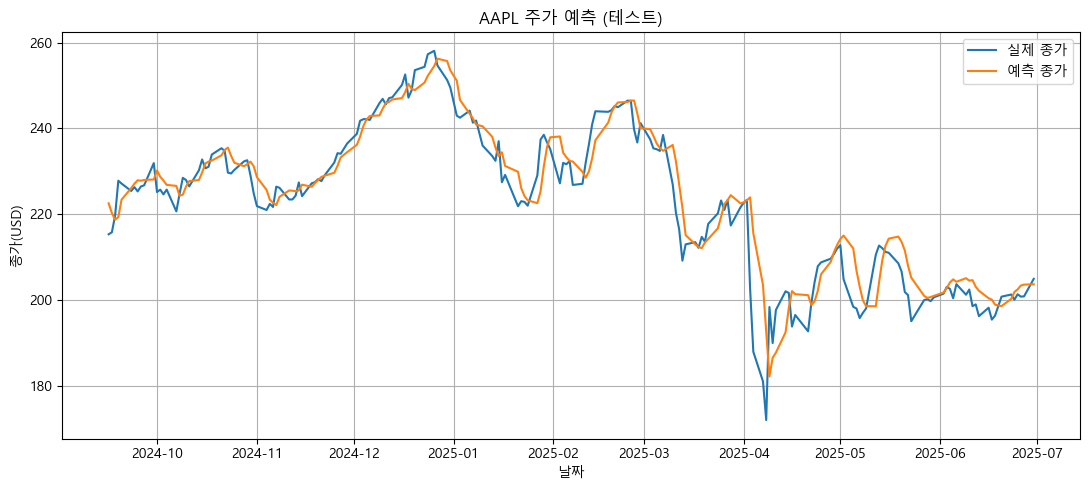

In [19]:
# 9) 날짜 축을 사용한 시각화
#    - dates_test는 y_test와 1:1로 대응하는 날짜
plt.figure(figsize=(11,5))
plt.plot(dates_test, y_test_inv, label='실제 종가')
plt.plot(dates_test, y_pred_inv, label='예측 종가')
plt.title('AAPL 주가 예측 (테스트)')
plt.xlabel('날짜')
plt.ylabel('종가(USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
def forecast_future(model, data_scaled, window=10, steps=5):
    """
    data_scaled: 전체 스케일된 시계열 (마지막 구간까지 포함)
    window: 입력 시퀀스 길이
    steps: 앞으로 예측할 일 수
    데이터를 자르면 (window, 1) (예: (10,1)) 이 나오는데, 이건 LSTM 입장에서 batch 축이 없는 상태
    그래서 (1, window, 1) 로 reshape 해서 batch 차원을 앞에 붙여줘야 LSTM이 받아들일 수 있는 모양으로 바뀜
    
    Returns
    -------
    np.ndarray, shape = (steps, 1)
        스케일된 미래 예측값. 실제 단위(USD 등)로 보려면 scaler.inverse_transform()을 적용해야 함
    """
    # 1. 마지막 window 길이만큼 데이터를 잘라와서 초기 입력 시퀀스로 사용
    #    data_scaled[-window:] → (window, 1)
    #    LSTM 입력 규격에 맞추려면 (1, window, 1)로 reshape 필요
    # 입력 shape=(batch_size, timesteps, features)

    current_seq = data_scaled[-window:].reshape(1, window, 1) 

    predictions = []  # 예측 결과를 담을 리스트

    # 2. steps 번 반복하면서 한 스텝씩 미래를 예측
    for _ in range(steps):
        # 모델에 현재 시퀀스를 넣어서 다음 시점 값 예측
        # 출력 모양은 (1, 1) → batch=1, 출력뉴런=1
        next_pred = model.predict(current_seq, verbose=0)   # shape: (1, 1)

        # 예측값을 스칼라로 꺼내 리스트에 저장
        predictions.append(next_pred[0, 0])

        # 시퀀스를 갱신
        # - 현재 시퀀스의 맨 앞 1개 타임스텝을 버리고(window-1 길이 유지)
        # - 방금 예측한 값을 맨 뒤에 붙여서 window 길이를 유지
        # next_pred는 (1, 1) → 시간축에 붙이려면 (1, 1, 1)로 reshape 필요
        next_pred_reshaped = next_pred.reshape(1, 1, 1)     # shape: (1, 1, 1)

        # current_seq[:, 1:, :] : (1, window-1, 1)
        # next_pred_reshaped : (1, 1, 1)
        # concat 결과 : (1, window, 1)
        current_seq = np.concatenate([current_seq[:, 1:, :], next_pred_reshaped], axis=1)

    # 3. 예측값 리스트를 (steps, 1) 모양의 배열로 변환해 반환
    return np.array(predictions).reshape(-1, 1)

In [21]:
import pandas as pd
import yfinance as yf

# 1) 모델 예측 5일치
# 미래 5일치 예측 (스케일된 값)
future_scaled = forecast_future(model, close_scaled, window=10, steps=5)

# 원래 단위(USD)로 되돌리기
future_prices = scaler.inverse_transform(future_scaled)

print("향후 5일 예측 (USD):", future_prices.ravel())

# 2) 실제 2025-07-02 이후 5영업일 다운로드
df_future = yf.download("AAPL", start="2025-07-02", end="2025-07-10")
real_future = df_future["Close"].head(5)  # 5영업일

# 3) 비교 DataFrame 생성
comparison = pd.DataFrame({
    "실제 종가": real_future.values.ravel(),             
    "예측 종가": future_prices[:len(real_future)].ravel()
}, index=real_future.index)

print(comparison)

향후 5일 예측 (USD): [205.26807 206.53677 207.81921 209.13252 210.51514]


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_1340\113812536.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_future = yf.download("AAPL", start="2025-07-02", end="2025-07-10")
[*********************100%***********************]  1 of 1 completed

                 실제 종가       예측 종가
Date                              
2025-07-02  212.199173  205.268066
2025-07-03  213.307922  206.536774
2025-07-07  209.711990  207.819214
2025-07-08  209.771927  209.132523
2025-07-09  210.900650  210.515137


##### 자연어 - 셜록홈즈 빈칸추론 (LSTM)
- 셜록홈즈 내용 기반 빈칸 추론

In [22]:
import os

# 1. Sherlock 폴더 내 모든 txt 파일 불러오기
# sherlock 폴더에 .txt 파일들이 있다고 가정
# 영어 원문은 대소문자/구두점 혼재 → 여기서는 소문자 통일만 간단 적용
texts = []
root = 'sherlock'  # sherlock 디렉토리에 저장하기 위함
max_files = 10     # 처리할 텍스트 파일 수 제한(데모 목적)

for i, fname in enumerate(os.listdir(root)):
    if fname.endswith('.txt') and i < max_files:
        with open(os.path.join(root, fname), 'r', encoding='utf-8') as f:
            texts.append(f.read().lower())

combined_text = '\n'.join(texts)

# 2) 전처리 결과를 파일로 저장(옵션)
with open('sherlock.txt', 'w', encoding='utf-8') as f:
    f.write(combined_text)
print("sherlock.txt 파일 저장 완료")

sherlock.txt 파일 저장 완료


In [23]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [24]:
# 3) 텍스트 불러오기
with open('sherlock.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()

In [25]:
# 4) 문장 단위로 나누기
#   - 간단히 개행('\n') 기준으로 분리
#   - 빈 줄, 매우 짧은 줄은 노이즈일 수 있어 필터링 가능
sentences = [s for s in text.split('\n') if len(s.strip()) > 0]

In [26]:
# 5) 토크나이저 생성 및 학습
#   - 단어 → 정수 인덱스 매핑
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
total_words = len(tokenizer.word_index) + 1  # 어휘 수(패딩용 0 포함)

In [27]:
# 6) n-gram 시퀀스 생성
#   - 예: "the detective was" → [the], [the detective], [the detective was] 식으로 누적
#   - 각 시퀀스의 마지막 단어를 정답(label)로 사용
input_sequences = []
for line in sentences:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        seq = token_list[:i+1]  # 길이 2 이상인 누적 시퀀스
        input_sequences.append(seq)

# 테스트를 위함이므로 데이터 양이 너무 많을 경우 학습 시간을 줄이기 위해 상한 설정
input_sequences = input_sequences[:50000]

In [28]:
# 7) 패딩: 시퀀스 길이를 동일하게 맞춤
max_seq_len = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

In [29]:
# 8) 훈련 데이터 준비: X(입력)와 y(정답) 분리
#   - 마지막 토큰이 정답 단어 인덱스가 되며, sparse_categorical_crossentropy와 함께 사용
X = input_sequences[:, :-1]
labels = input_sequences[:, -1]
y = labels  # sparse 사용 시 원-핫 인코딩 불필요

In [30]:
# 9) 모델 구성
#   - Embedding: 정수 인덱스를 밀집 벡터로 매핑(단어 임베딩)
#   - LSTM: 시퀀스 의존성 학습
#   - Dense(total_words): 다음 단어 확률 분포 출력
model = Sequential([
    Embedding(input_dim=total_words, output_dim=50, input_length=max_seq_len-1),
    LSTM(64),
    Dense(total_words, activation='softmax')
])

c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [31]:
# 10) 컴파일
#   - loss='sparse_categorical_crossentropy': y가 정수 인덱스일 때 사용
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# 11) 학습
#   - epochs는 데이터 크기/모델 용량에 따라 조정
history = model.fit(X, y, epochs=100, batch_size=128)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.0484 - loss: 6.7016
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.0497 - loss: 6.2043
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.0552 - loss: 6.0916
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.0627 - loss: 5.9889
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.0695 - loss: 5.8951
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.0803 - loss: 5.8029
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.0916 - loss: 5.7015
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.1034 - loss: 5.5758
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.1107 - loss: 5.4609
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.1181 - loss: 5.3624
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.1262 - loss: 5.2761
Epoch 12/100
391/391 ━━━━━

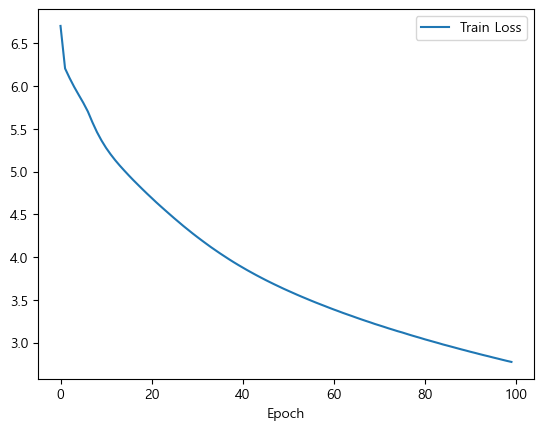

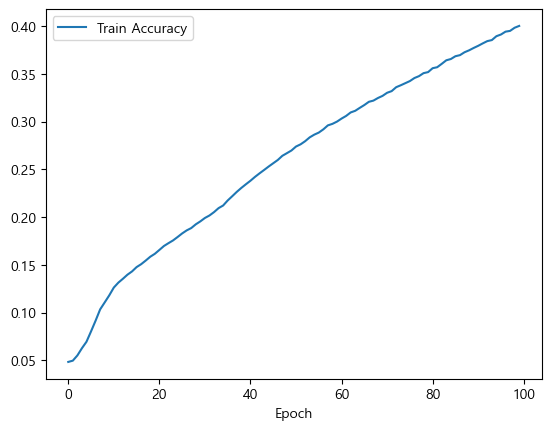

In [33]:
# 9. 학습 결과 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [34]:
# 13) 다음 단어 예측 함수
#   - 전달받은 텍스트 시드에 대해 다음 단어를 1개 예측
def predict_next_word(model, tokenizer, text_seed):
    # 현재 문장을 정수 시퀀스로 변환
    token_list = tokenizer.texts_to_sequences([text_seed])[0]
    # 모델 입력 길이(max_seq_len-1)에 맞춰 앞쪽을 패딩
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    # 다음 단어 확률 분포 예측
    pred = model.predict(token_list, verbose=0)
    # 가장 확률이 높은 인덱스 선택
    next_index = np.argmax(pred)
    # 인덱스를 단어로 역매핑
    return tokenizer.index_word.get(next_index, "<UNK>")

In [35]:
# 14) 예측 테스트
test_phrases = [
    "the detective was",
    "he looked at",
    "it was a",
    "the room was"
]
for phrase in test_phrases:
    print(f"{phrase} → {predict_next_word(model, tokenizer, phrase)}")

the detective was → the
he looked at → the
it was a → very
the room was → a


In [36]:
# 추가 참고 사항
# - 어휘 수(total_words)가 커지면 출력층 파라미터 수가 급증 → 학습 비용 상승
# - 전처리(구두점 제거/표제어화), 서브워드 토크나이저(BPE 등) 적용을 고려하면 개선 가능
# - 다음 단어 1개가 아니라 여러 단어를 생성하려면 루프를 돌며 시드에 예측 단어를 이어붙이는 방식 사용